In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('titanic.csv')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [5]:
dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
dataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [7]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [8]:
dataset.drop(columns=['Name'])

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,0,27.0,0,0,13.0000
883,1,1,1,19.0,0,0,30.0000
884,0,3,1,7.0,1,2,23.4500
885,1,1,0,26.0,0,0,30.0000


In [10]:
# Dataset des survivants
survivors = dataset[dataset['Survived'] == 1]

# Dataset des non-survivants
non_survivors = dataset[dataset['Survived'] == 0]

dataset.describe()


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


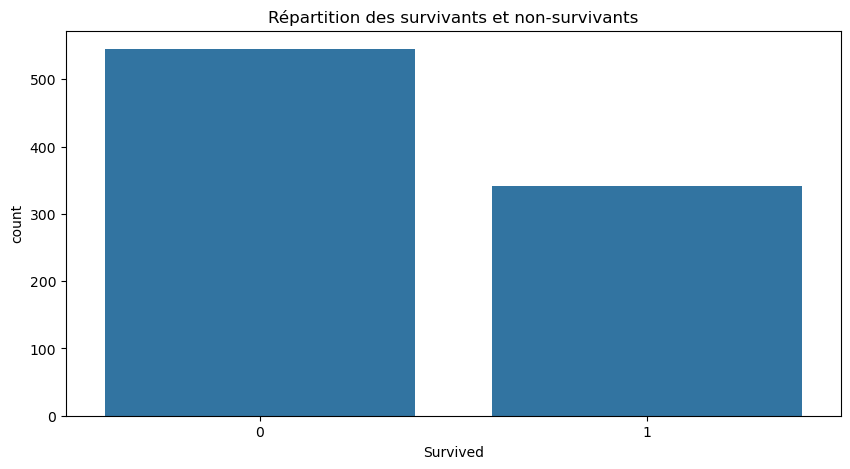

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=dataset)
plt.title('Répartition des survivants et non-survivants')
plt.show()

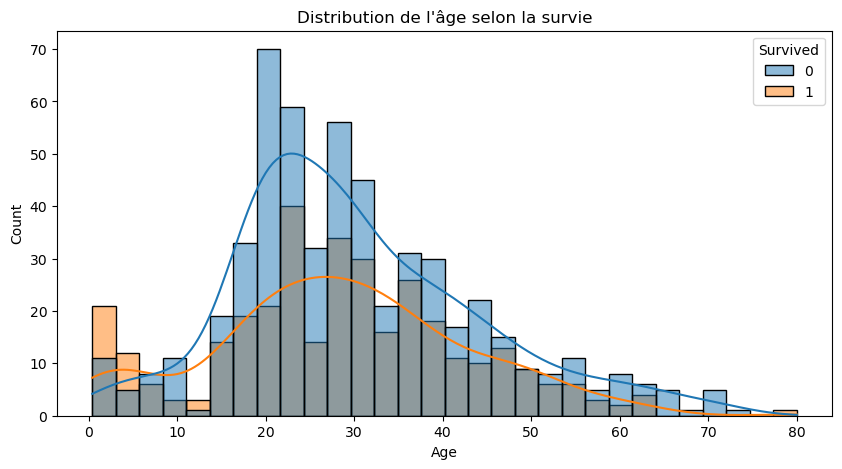

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(dataset, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribution de l\'âge selon la survie')
plt.show()

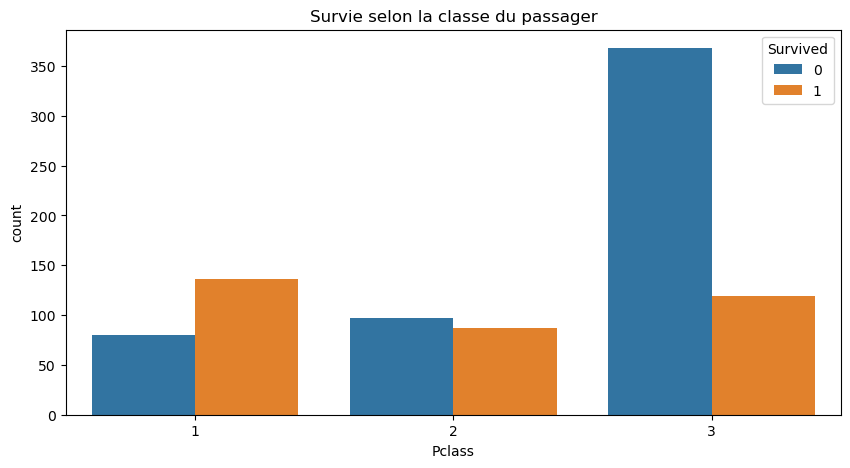

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Survie selon la classe du passager')
plt.show()